# Exploring VicRoads Bike Crash data

VicRoads host crash data on their [ArcGIS Open Data site](http://vicroadsopendata.vicroadsmaps.opendata.arcgis.com/).  This data changes freqently, so the purpose of this notebook (my first one) is to explore the live data from the site and see what patterns are within it.

First off, lets get some libraries and adjust the styling of the charts

In [1]:
import csv
import urllib2
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
# Enable inline plotting
%matplotlib inline

### Getting the data

The crash data is for all crashes.  Although we could filter the crashes here in python, we might as well let ArcGIS Open Data do the filtering for us.  

As we are only interested in bike crashes, we have applied an attribute filter [**'BICYCLIST > 1'**](http://vicroadsopendata.vicroadsmaps.opendata.arcgis.com/datasets/c2a69622ebad42e7baaa8167daa72127_0?uiTab=table&filterByExtent=false&orderByFields=BICYCLIST+DESC&geometry=123.62%2C-39.293%2C165.434%2C-34.008&where=BICYCLIST+%3E%3D+1+AND+BICYCLIST+%3C%3D+8)



<img src="getlink.gif">

We can then use this dynamic link to grab the filtered CSV for analysis in this notebook.  The following feeds the records into a [Pandas](http://pandas.pydata.org/) dataframe.  Pandas is an excellent python module for working with numerical tables and time series data.

In [2]:
url = 'http://vicroadsopendata.vicroadsmaps.opendata.arcgis.com/datasets/c2a69622ebad42e7baaa8167daa72127_0.csv?where=BICYCLIST%20%3E%3D%201&inSR=102100&geometry=%7B%22xmin%22%3A13844444.803560872%2C%22ymin%22%3A-4749031.404608972%2C%22xmax%22%3A18499154.078013726%2C%22ymax%22%3A-4015235.9330714755%2C%22spatialReference%22%3A%7B%22wkid%22%3A102100%2C%22latestWkid%22%3A3857%7D%7D'
response = urllib2.urlopen(url)
cr = csv.reader(response)
# Push the response into a Pandas data frame called bc for bike crashes
bc = pd.read_csv(response, parse_dates=['ACCIDENT_DATE']) 

### How many records are there?

Remember, this notebook is pointing to live data, therefore the results will be different as the data gets updated. The below cell explains what is within the dataframe.  The first number is the number of rows, the second is the number of columns.

In [3]:
bc.shape

(8043, 65)

We can return the first three records in the table to make sure things look as expected.

In [4]:
bc[:3]

,﻿X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,144.746966,-36.123918,3015,T20100039097,ABS to receive accident,Finished,2010-09-30,17.50.00,No,Collision with vehicle,...,Small Provincial Cities,CAMPASPE,NORTHERN REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Country
1,144.787488,-37.737974,3028,T20100039141,ABS to receive accident,Finished,2010-09-30,15.45.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
2,145.276442,-38.082238,3043,T20100039214,ABS to receive accident,Finished,2010-01-10,13.47.00,No,Collision with vehicle,...,Metropolitan Excluding CBD,CASEY,METROPOLITAN SOUTH EAST REGION,M,M,Arterial Highway,"Arterial Highway,Arterial Other",Undivided,Undivided,Metro


### Which day do most crashes happen?

In [5]:
# aggregate by day of the week
crashes_by_day = bc['DAY_OF_WEEK'].value_counts()
print crashes_by_day

Wednesday    1376
Tuesday      1374
Thursday     1359
Friday       1183
Monday       1086
Saturday      867
Sunday        747
Name: DAY_OF_WEEK, dtype: int64


But lets plot that out just because we can.

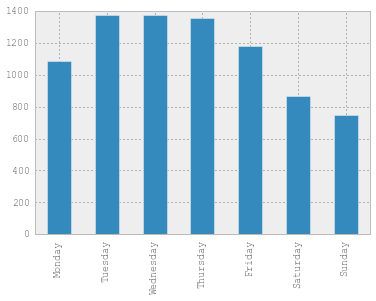

In [6]:
# First change sorting to chronological days of the week as opposed to ordered by #crashes
bc['DAY_OF_WEEK'] = pd.Categorical(bc['DAY_OF_WEEK'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
crashes_by_day = bc['DAY_OF_WEEK'].value_counts()
crashes_by_day = crashes_by_day.sort_index()

crashes_by_day.plot(kind='bar')

### How do the total crashes change over the months?

With pandas we can aggregate the total crashes into months using the ACCIDENT_DATE field.

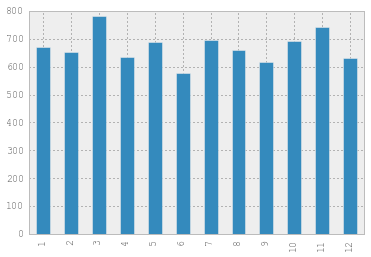

In [7]:
# Add an additional column to break out the months
bc['month'] = [t.month for t in bc.ACCIDENT_DATE]
# Then aggregate the totals by month
crashes_by_month = bc['month'].value_counts()
crashes_by_month = crashes_by_month.sort_index()

crashes_by_month.plot(kind='bar')


### What about the time of  day?

Lets take a look at what times during the day the crashes ocurr.   We have a ACCIDENT_TIME field, so lets use Pandas to help  aggregate this into 15 minute chunks

In [8]:
bc['hour'] = [t.hour for t in bc.ACCIDENT_TIME]

AttributeError: 'str' object has no attribute 'hour'